# Introduction to Deep Reinforcement Learning using GPU Asynchronous Advantage Actor-Critic (GA3C)

In this lab we'll learn how to train an AI to play Atari games using Deep Reinforcement Learning.  First, we'll learn how to use the OpenAI Gym API and then we'll train bots to play Atari with the GA3C algorithm.


---
Before we begin, let's verify [WebSockets](http://websocketstest.com) are working on your system.  To do this, execute the cell block below by giving it focus (clicking on it with your mouse), and hitting Ctrl-Enter, or pressing the play button in the toolbar above.  If all goes well, you should see some output returned below the grey cell.  

You will know the lab is processing when you see a solid circle in the top-right of the window that looks like this: ![](jupyter_executing.png)
Otherwise, when it is idle, you will see the following: ![](jupyter_idle.png)
For troubleshooting, please see [Self-paced Lab Troubleshooting FAQ](https://developer.nvidia.com/self-paced-labs-faq#Troubleshooting) to debug the issue.

In [ ]:
two_pi = 2*3.14159
print(two_pi)

# Introduction to OpenAi's Gym


OpenAi's Gym is a open source software platform that provides many environments for RL agents to explore. The available environments range from classic control environments like CartPole
<video controls src="https://openai-kubernetes-prod-scoreboard.s3.amazonaws.com/v1/evaluations/eval_RrBNqWekTmGLCnEkETNIyw/training_episode_batch_video.mp4" />


to Atari environments:
<video controls src="https://openai-kubernetes-prod-scoreboard.s3.amazonaws.com/v1/evaluations/eval_glkKKInTm6GlmcOQRZuhQ/training_episode_batch_video.mp4" />

And many more environments including: Minecraft and Doom!

Gym has a consistent API which allows users to easily experiment with many environments and also create their own. 

Now that we've discussed the OpenAI Gym environment, lets familiarize ourselves with how an agent would interact with a game. 



## Assignment
1. Load the Taxi game
2. Learn to move in the space using actions [ play around to figure out what the actions do ]
3. Pickup a passenger & drive them to their destination
4. Keep track of the reward you receive


# Goals
- Learn the API calls to  interact with a game environment
- Teach agents to do the same thing using NNs and trial-and-error with feedback from the game/environment

The main API calls used to interact with an environment are: 
- step: perform one action in the environment and receive a new state and a reward
- reset: reset the environment and receive a new state
- render: visualize the environment 
- close: shut down the environment

In the cell below we'll launch a new instance of the game Taxi.

In [ ]:
import gym

# instantiate the environment by calling gym.make
env = gym.make('Taxi-v2')
env.reset() # resets the state of the environment and returns an initial state

# environments can be visualized by calling .render()
env.render()

The goal of Taxi is to pick up the passenger at one locaton and drop him off in another.  You receive 20 points for dropping off the passenger successfully and you lose 1 point for every timestep that it takes.  There's  a 10 point penalty for illegal pick-ups and drop-offs.

The colors below indicate the taxi location and the locations of different objectives on the map.

- blue: passenger
- magenta: destination
- yellow: empty taxi
- green: full taxi
- other letters: locations

## Exploration

To explore the environment call the step method. Each step will take an action as input and output the new state of the environment along with a reward.

In the Taxi environment: you're allowed to input actions 0-5

In [ ]:
# here's an example of moving the taxi south (if possible)
env.step(0)

After calling env.step(0) the Taxi should move south in the environment unless it is blocked by a wall.

You should see something like (352, -1, False, {'prob': 1.0})

352 corresponds to the new state

-1 is the reward returned after taking that action

False means the episode is not done yet.

And you can ignore the {'prob': 1.0}


In [ ]:
# after taking a step, render the environment to see the results visually
env.render()

In the cell below try to navigate the taxi to the passenger and pick them up.  Modify the actions by changing the input to env.step

In [ ]:
# step through the environment and feel free to render along the way
my_step = env.step(4)
print("reward: " + str(my_step[1]))
env.render()

Once you've picked up the passenger, take them to their destination.  You should see a reward of 20 points for dropping them off successfully.

In [ ]:
# step through the environment and feel free to render along the way
my_step = env.step(0)
print("reward: " + str(my_step[1]))
env.render()

Once you've dropped off the passenger, reset the environment to play again.

In [ ]:
env.reset()
env.render()

## Random Policy

With the Gym API we can easily have our agent to act according to a random policy.  Execute the cell below many times and watch the progress of the agent.  

In [ ]:
random_action = env.action_space.sample()
env.step(random_action)
env.render()

The agent doesn't do so well.  With reinforcement learning we can teach agents to learn complex and efficient policies to solve many different games.  In order to solve more complex environments like Atari, we'll need to use deep reinforcement learning algorithms.

# Deep Reinforcement Learning

## Using a neural net to play Atari games
In order to reduce computational complexity, frames from the Atari environment are first converted to grayscale and then down-sampled and finally cropped to an 84x84 region of the image that trys to capture as much of the playing area as possible.  

In the OpenAI Atari environments frames are skipped.  For the deterministic envs that we will use below, 4 frames are skipped at time.  This means that the agent will repeat the same action for four frames of the game and we will input 4 frames into the DNN as a single "image".  Each frame can be though of as a "channel".

Doing so allows the DNN to capture more information about the game than single frame at time would allow.  For example, velocity information would be impossible to capture by looking at a single frame.

The DNN consists of two 2D convolutional layers each with relu activations followed by a fully connected hidden layer with 256 neurons an a relu activation.  The output is a fully connected linear layer with one output for each valid action in the game.

## Pre-trained agent for Pong
For this lab, we've loaded a pre-trained agent that can play Pong. Execute the cell below to start recording the trained agent playing Pong. Wait at least 8 rounds and then interrupt the agent.  

To stop the agent go to kernel -> interrupt in the jupyter menu

In [2]:
!cd ~/GA3C/ga3c;./_clean.sh;cp /home/ubuntu/models/pong/checkpoints/* ~/GA3C/ga3c/checkpoints;DISPLAY=:0 python3 GA3C.py ATARI_GAME=PongDeterministic-v0 PLAY_MODE=True 

2017-05-09 06:50:19.562270: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 06:50:19.562326: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 06:50:19.562336: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 06:50:19.562343: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 06:50:19.562351: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

We've saved the gameplay in a .mp4 file on the AWS instance.  Execute the two cells below to load the video in the Jupyter notebook.  Make sure to download the video to your laptop if you want to keep it for later viewing.

In [6]:
# helper function to watch gameplay videos

import io
import base64
from IPython.display import HTML

def watch_video(video_file):
    video = io.open(video_file, 'r+b').read()
    encoded = base64.b64encode(video)

    my_html = HTML(data='''<video alt="test" controls>
         <source src="data:video/mp4;base64,{0}" type="video/mp4" />
         </video>'''.format(encoded.decode('ascii')))
    return my_html

In [7]:
video_file = '/home/ubuntu/GA3C/ga3c/tmp/openaigym.video.1.uid.video000008.mp4'
watch_video(video_file)

What strategy has the agent found?

*Enter your answer here:*

# Visualizing Training Progress

We can visualize the progress our agent is making by looking at the rolling average return.  The helper function below will help us visualize are agents progress.

In [8]:
# helper function to plot rewards
import pandas as pd
import matplotlib.pyplot as plt

def plot_reward(filename, window_size):
    
    plt.clf()
    
    results = pd.read_csv(filename, names=['episode_time', 'reward', 'length'])

    results['episode_time'] = pd.to_datetime(results['episode_time'])

    results['time'] = results['episode_time'] - results['episode_time'][0] 

    results['rolling_reward'] = results['reward'].rolling(window = window_size).mean()

    results.plot('time', 'rolling_reward')

    plt.show()

Execute the code below to see how the Pong agent learned over time.

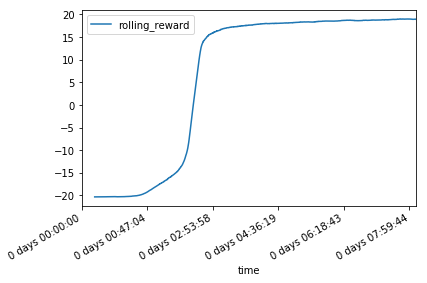

In [9]:
FILE_PATH = '/home/ubuntu/models/pong/results.txt'
WINDOW_SIZE = 1000

plot_reward(FILE_PATH, WINDOW_SIZE)

By analyzing the curve we see that it took about 3 hours for our agent to solve Pong.  After 3 hours we are getting diminishing returns.

Another way of studying our agent's progress is by watching how the agent plays at different checkpoints in the training.  Execute the cell below to see how the agent performs after 1000 games of training.  Wait for at least 8 rounds of gameplay and then interrupt the agent.

To stop the agent and continue on with the lab interrupt the kernel: kernel -> interrupt.

In [10]:
!cd ~/GA3C/ga3c;DISPLAY=:0 python3 GA3C.py ATARI_GAME=PongDeterministic-v0 PLAY_MODE=True LOAD_EPISODE=1000

2017-05-09 07:03:44.251737: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:03:44.251781: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:03:44.251791: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:03:44.251798: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:03:44.251805: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

Execute the cell below to see watch the agent play.  Make sure to download the video to your laptop if you'd like to keep it.

In [11]:
video_file = '/home/ubuntu/GA3C/ga3c/tmp/openaigym.video.1.uid.video000008.mp4'
watch_video(video_file)

Clearly the agent hasn't learned much after 1000 games.  Execute the code below to see how the agent performs after 8000 games. Wait until the agent has played at least 8 games before interrupting.  The games might take longer because the opponents are pretty evenly matched.

To stop the agent and continue on with the lab interrupt the kernel: kernel -> interrupt.

In [12]:
!cd ~/GA3C/ga3c;DISPLAY=:0 python3 GA3C.py ATARI_GAME=PongDeterministic-v0 PLAY_MODE=True LOAD_EPISODE=8000

2017-05-09 07:07:08.353766: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:07:08.353810: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:07:08.353820: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:07:08.353827: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:07:08.353834: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

Execute the cell below to see watch the agent play.  Make sure to download the video to your laptop if you'd like to keep it.

In [13]:
video_file = '/home/ubuntu/GA3C/ga3c/tmp/openaigym.video.1.uid.video000008.mp4'
watch_video(video_file)

## Train a Boxing Agent

Since it takes about 3 hours to train a boxing agent, we've loaded a partially trained model.  Follow the steps below to finish the training.

1. View the trained agent playing against the computer
2. Continue training [ 30 minutes ]
3. Interrupt Training
4. View the improved agent playing against the computer

# Load the pre-trained boxing models


We've loaded a partially trained boxing model.  Wait until the agent has played at least 8 games before interrupting.

To stop the agent and continue on with the lab interrupt the kernel: kernel -> interrupt.


In [14]:
!cd /home/ubuntu/GA3C/ga3c/;sh _clean.sh;cp ~/models/boxing/checkpoints/* ~/GA3C/ga3c/checkpoints;DISPLAY=:0 python3 GA3C.py ATARI_GAME=BoxingDeterministic-v0 PLAY_MODE=True LOAD_EPISODE=3000  

2017-05-09 07:15:12.228044: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:15:12.228089: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:15:12.228104: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:15:12.228117: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:15:12.228127: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

Execute the cell below to see watch the agent play.  Make sure to download the video to your laptop if you'd like to keep it.

In [15]:
video_file = '/home/ubuntu/GA3C/ga3c/tmp/openaigym.video.1.uid.video000008.mp4'
watch_video(video_file)

You should see that the agent is putting up a fight but is still losing.  See if you can train this agent so that it wins every time.

When you think you've trained for long enough interrupt the kernel.

kernel -> interrupt

In [23]:
# resume training
!cd ~/GA3C/ga3c;python3 GA3C.py ATARI_GAME=BoxingDeterministic-v0 LOAD_CHECKPOINT=True SAVE_FREQUENCY=10

2017-05-09 07:38:32.053811: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:38:32.053855: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:38:32.053865: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:38:32.053871: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:38:32.053878: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

[Time:      290] [Episode:     3147 Score:    36.0000] [RScore:    26.0213 RPPS:   306] [PPS:   307 TPS:    72] [NT:  3 NP:  2 NA: 33]
[Time:      291] [Episode:     3148 Score:    42.0000] [RScore:    26.3542 RPPS:   311] [PPS:   312 TPS:    73] [NT:  3 NP:  2 NA: 33]
[Time:      296] [Episode:     3149 Score:    31.0000] [RScore:    26.4490 RPPS:   312] [PPS:   313 TPS:    73] [NT:  3 NP:  2 NA: 33]
[Time:      296] [Episode:     3150 Score:    23.0000] [RScore:    26.3800 RPPS:   318] [PPS:   319 TPS:    73] [NT:  3 NP:  2 NA: 33]
[Time:      297] [Episode:     3151 Score:    36.0000] [RScore:    26.5686 RPPS:   323] [PPS:   324 TPS:    72] [NT:  3 NP:  2 NA: 33]
[Time:      300] [Episode:     3152 Score:    26.0000] [RScore:    26.5577 RPPS:   326] [PPS:   327 TPS:    72] [NT:  3 NP:  2 NA: 33]
[Time:      302] [Episode:     3153 Score:    22.0000] [RScore:    26.4717 RPPS:   330] [PPS:   331 TPS:    72] [NT:  3 NP:  2 NA: 33]
[Time:      302] [Episode:     3154 Score:    14.0000] 

Now, that you've trained your model for a while see how it's doing by viewing its learning curve.

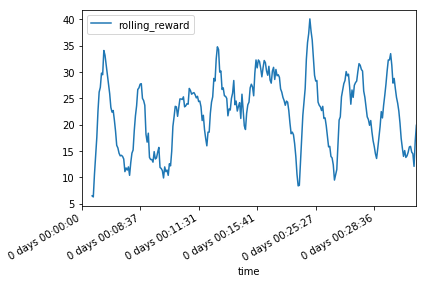

In [24]:
FILE_PATH = '/home/ubuntu/GA3C/ga3c/results.txt'
WINDOW_SIZE = 10

plot_reward(FILE_PATH, WINDOW_SIZE)

Execute the cell below to record the agent playing. Wait until the agent has played at least 8 games before interrupting.

To stop the agent and continue on with the lab interrupt the kernel: kernel -> interrupt.

In [25]:
!cd /home/ubuntu/GA3C/ga3c/;DISPLAY=:0 python3 GA3C.py ATARI_GAME=BoxingDeterministic-v0 PLAY_MODE=True  

2017-05-09 07:47:35.755793: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:47:35.755845: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:47:35.755856: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:47:35.755863: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 07:47:35.755870: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

Execute the cell below to see watch the agent play.  Make sure to download the video to your laptop if you'd like to keep it.

In [26]:
video_file = '/home/ubuntu/GA3C/ga3c/tmp/openaigym.video.1.uid.video000008.mp4'
watch_video(video_file)

If you're not satisfied with your agents performance.  Feel free to go back and let it practice by playing some more games.

Here's the learning curve of a boxing agent that trained for 8 hours.

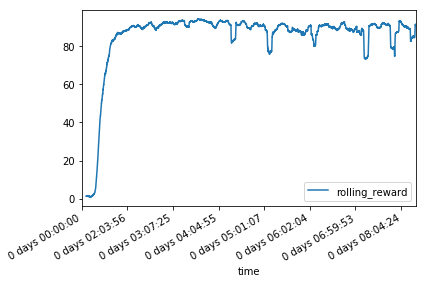

In [27]:
FILE_PATH = '/home/ubuntu/models/boxing/results.txt'
WINDOW_SIZE = 1000

plot_reward(FILE_PATH, WINDOW_SIZE)

Execute the cell below to record the trained boxing agent playing. Wait until the agent has played at least 8 games before interrupting.

To stop the agent and continue on with the lab interrupt the kernel: kernel -> interrupt.

In [28]:
!cd ~/GA3C/ga3c;./_clean.sh;cp /home/ubuntu/models/boxing_trained/checkpoints/* ~/GA3C/ga3c/checkpoints;DISPLAY=:0 python3 GA3C.py ATARI_GAME=BoxingDeterministic-v0 PLAY_MODE=True 

2017-05-09 08:02:36.009911: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 08:02:36.009958: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 08:02:36.009968: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 08:02:36.009975: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 08:02:36.009982: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

Execute the cell below to see watch the agent play.  Make sure to download the video to your laptop if you'd like to keep it.

In [29]:
video_file = '/home/ubuntu/GA3C/ga3c/tmp/openaigym.video.1.uid.video000008.mp4'
watch_video(video_file)

KOOOOOOOOOOO!!!!!!!

# Next Steps

Not every game is as easy to learn as Pong and Boxing.  Look at the learning curve below for KungFuMaster.

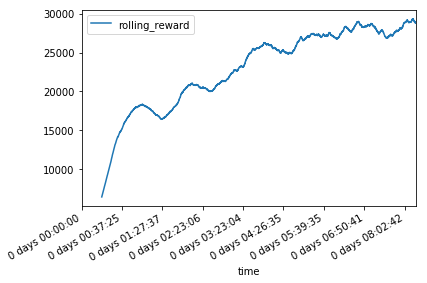

In [30]:
FILE_PATH = '/home/ubuntu/models/kungfu/results.txt'
WINDOW_SIZE = 1000

plot_reward(FILE_PATH, WINDOW_SIZE)

Now, let's watch the agent play.

Execute the cell below to record the agent playing. Wait until the agent has played at least 8 games before interrupting.

To stop the agent and continue on with the lab interrupt the kernel: kernel -> interrupt.

In [35]:
!cd ~/GA3C/ga3c;./_clean.sh;cp /home/ubuntu/models/kungfu/checkpoints/* ~/GA3C/ga3c/checkpoints;DISPLAY=:0 python3 GA3C.py ATARI_GAME=KungFuMasterDeterministic-v0 PLAY_MODE=True 

2017-05-09 08:11:25.907868: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 08:11:25.907911: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 08:11:25.907920: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 08:11:25.907929: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-05-09 08:11:25.907936: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

Execute the cell below to see watch the agent play.  Make sure to download the video to your laptop if you'd like to keep it.

In [36]:
video_file = '/home/ubuntu/GA3C/ga3c/tmp/openaigym.video.1.uid.video000008.mp4'
watch_video(video_file)

We can see the agent has learned quite a bit but still has a ways to go.  We can certainly improve the agent by training it for longer.  What other tools do we have at our disposal?

# Network Architecture

Here's a snippet of the code from GA3C that describes the agent's neural network:

```python
# As implemented in the original A3C paper
self.n1 = self.conv2d_layer(self.x, 8, 16, 'conv11', strides=[1, 4, 4, 1])
self.n2 = self.conv2d_layer(self.n1, 4, 32, 'conv12', strides=[1, 2, 2, 1])
self.action_index = tf.placeholder(tf.float32, [None, self.num_actions])
_input = self.n2

flatten_input_shape = _input.get_shape()
nb_elements = flatten_input_shape[1] * flatten_input_shape[2] * flatten_input_shape[3]

self.flat = tf.reshape(_input, shape=[-1, nb_elements._value])
self.d1 = self.dense_layer(self.flat, 256, 'dense1')
```

We can see that there are two conv2d layers followed by a fully connected dense layer.  Here are some things that could potentially improve the agent's capacity to learn:

- Add more conv2d layers 
- Add more dense layers
- Add more hidden neurons to the layers
- Replace the fully connected layer with an LSTM layer (More advanced)

# Summary

In this lab we've learned how to use OpenAi's Gym to train reinforcement learning agents.  We learned how to manually traverse the Taxi environment using the Gym API.  We then used GA3C to train agents to play the Atari games Pong, Boxing, and KungFuMaster.  We saw that by investigating the rolling average reward from the agent's games we can gauge an agent's progress and determine if we need to train for longer or try a different algorithm.  If we decide that the agent only needs longer to train then we can resume training from a checkpoint.  If it appears that the agent is stuck, then it might be the case that the agent needs a neural network with a larger capacity.    